In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import tensorflow as tf 
import numpy as np


In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.9.0


In [3]:
#PPO logs upload
experiment_id = "D5SZnDngSgSedkT3HN1zyw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,.,rollout/ep_len_mean,139,34.750000
1,.,rollout/ep_len_mean,256,32.000000
2,.,rollout/ep_len_mean,356,29.666666
3,.,rollout/ep_len_mean,410,25.625000
4,.,rollout/ep_len_mean,462,23.100000
...,...,...,...,...
3599,.,train/loss,75224,1.761348
3600,.,train/loss,75232,1.655371
3601,.,train/loss,75292,5.011604
3602,.,train/loss,75333,1.049601


In [4]:
pivot1 = pd.pivot_table(df, index='tag')

In [5]:
pivot1

,step,value
tag,,
rollout/ep_len_mean,42546.986450,25.745472
rollout/ep_rew_mean,42546.986450,-38.443638
rollout/exploration_rate,42546.986450,0.109540
time/fps,42546.986450,573.233062
train/learning_rate,65212.309816,0.001000
train/loss,65212.309816,2.553101


In [6]:
pivot2 = pd.pivot_table(df, index='step', columns='tag', values='value')
pivot2

tag,rollout/ep_len_mean,rollout/ep_rew_mean,rollout/exploration_rate,time/fps,train/learning_rate,train/loss
step,,,,,,
139,34.750000,-91.000000,0.986795,71.0,NaN,NaN
256,32.000000,-77.375000,0.975680,124.0,NaN,NaN
356,29.666666,-65.583336,0.966180,165.0,NaN,NaN
410,25.625000,-39.750000,0.961050,186.0,NaN,NaN
462,23.100000,-23.549999,0.956110,205.0,NaN,NaN
...,...,...,...,...,...,...
75224,16.480000,24.270000,0.050000,136.0,0.001,1.761348
75232,14.210000,35.049999,0.050000,136.0,0.001,1.655371
75292,14.590000,33.459999,0.050000,136.0,0.001,5.011604


In [7]:
import os
os.getcwd()

'C:\\Users\\jozim\\Downloads\\PPO_Logs'

In [8]:
csv_path = 'C:\\Users\\jozim\\Downloads\\PPO_Logs\\tb_experiment_1.csv'
df.to_csv(csv_path, index=False)
df_roundtrip = pd.read_csv(csv_path)
pd.testing.assert_frame_equal(df_roundtrip, df)

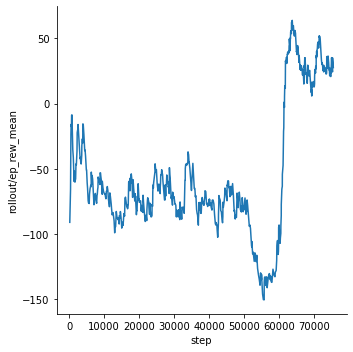

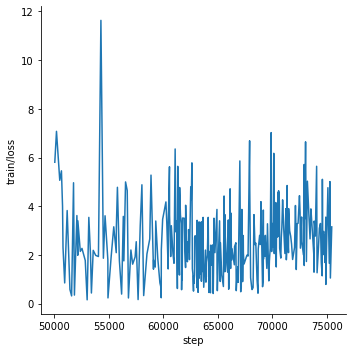

In [9]:
sns.relplot(x="step", y="rollout/ep_rew_mean", ci=None, kind="line", data=pivot2);
sns.relplot(x="step", y="train/loss", ci=None, kind="line", data=pivot2);

<AxesSubplot:xlabel='step', ylabel='rollout/ep_len_mean'>

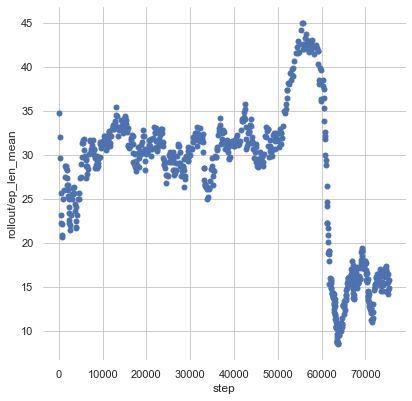

In [157]:
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="step", y="rollout/ep_len_mean",
                palette="ch:r=-.2,d=.3_r",
                hue_order=learning_ranking,
                sizes=(1, 8), linewidth=0,
                data=pivot2 , ax=ax)

<AxesSubplot:xlabel='step', ylabel='train/loss'>

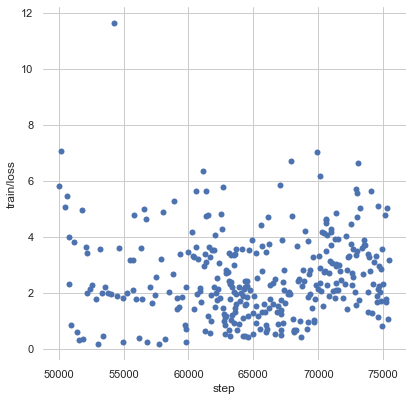

In [158]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="step", y="train/loss",
                palette="ch:r=-.2,d=.3_r",
                hue_order=learning_ranking,
                sizes=(1, 8), linewidth=0,
                data=pivot2 , ax=ax)

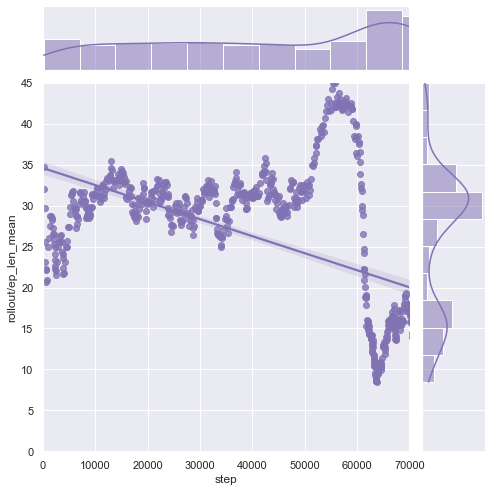

In [169]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="step", y="rollout/ep_len_mean", data=pivot2,
                  kind="reg", truncate=False,
                  xlim=(0, 70000), ylim=(0, 45),
                  color="m", height=7)

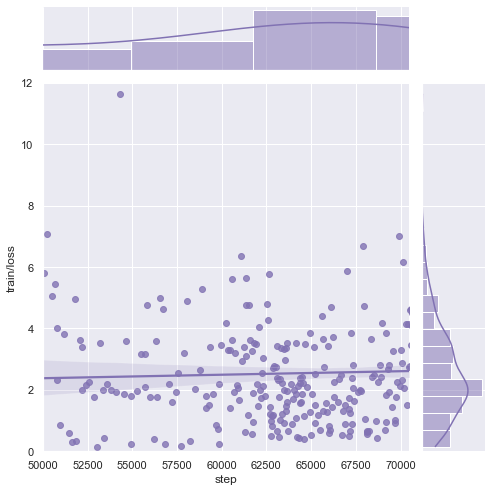

In [170]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="step", y="train/loss", data=pivot2,
                  kind="reg", truncate=False,
                  xlim=(50000, 70500), ylim=(0, 12),
                  color="m", height=7)